In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

plt.style.use('fivethirtyeight')


In [2]:
class Perceptron:
    def __init__(self, eta : float =None, epochs : int =None):
        self.weights = np.random.randn(3) * 1e-4 #small random weights
        training = (eta is not None )and (epochs is not None)
        if training:
            print(f"initial weights before training: \n{self.weights}")
        self.eta =eta
        self.epochs=epochs
    
    def _z_outcome(self,inputs,weights):
        return np.dot(inputs,weights)
    
    def activation_function(self,z):
        return  np.where(z>0,1,0)
    
    def fit(self,x,y):
        self.x=x
        self.y=y
        
        x_with_bias = np.c_[self.x,-np.ones((len(self.x),1))]
        print(f"x with bias: \n{x_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)
            
            z= self._z_outcome(x_with_bias,self.weights)
            y_hat=self.activation_function(z)
            print(f"predicted value after forward pass: \n{y_hat}")
            
            self.error = self.y -y_hat
            print(f"error: \n{self.error}")
            
            self.weights = self.weights + self.eta * np.dot(x_with_bias.T, self.error)
            print(f"updated weights after epochs: {epoch + 1}/{self.epochs}: \n{self.weights}")
            print("##"*10)
        
        
    
    def predict(self, x):
        x_with_bias = np.c_[x,-np.ones((len(x),1))]
        z= self._z_outcome(x_with_bias,self.weights)
        return self.activation_function(z)
    
    
    def total_loss(self):
        total_loss =np.sum(self.error)
        print(f"\n total loss:{total_loss}\n")
    
    def _create_dir_return_path(self, model_dir, filename):
        os.makedirs(model_dir, exist_ok= True)
        return os.path.join(model_dir, filename)
        
    
    def save(self, filename, model_dir = None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self,model_file_path)
        
        else :
            model_file_path = self._create_dir_return_path("model", filename)
            joblib.dump(self,model_file_path)
    
    def load(self, filepath):
        return joblib.load(filepath)       
        

In [3]:
def prepare_data(df, target_col = "y"):
    x =df.drop(target_col, axis =1)
    
    y= df['y']
    
    return x, y

In [4]:
AND ={
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,0,0,1]
    
}
df_AND =pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [5]:
x,y = prepare_data(df_AND)

ETA = 0.1 #0 AND 1

EPOCHS = 10

model_and = Perceptron(eta=ETA,epochs=EPOCHS )
model_and.fit(x,y)

_ =model_and.total_loss()

initial weights before training: 
[ 8.60470136e-05  1.55671217e-04 -3.29046074e-05]
x with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epochs: 1/10: 
[-0.09991395 -0.09984433  0.2999671 ]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epochs: 2/10: 
[8.60470136e-05 1.55671217e-04 1.99967095e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epochs: 3/10: 
[0.10008605 0.10015567 0.0999671 ]
####################
--------------------
for epoch >> 3
--------------------
pred

In [6]:
  OR ={
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,1,1,1]
    
}
df_OR =pd.DataFrame(OR)
df_OR                                                                    

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [7]:
  XOR ={
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,1,1,0]
    
}
df_XOR =pd.DataFrame(XOR)
df_XOR                                                                    

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [8]:
x,y = prepare_data(df_OR)

ETA = 0.1 #0 AND 1

EPOCHS = 10

model_OR = Perceptron(eta=ETA,epochs=EPOCHS )
model_OR.fit(x,y)

_ =model_OR.total_loss()

initial weights before training: 
[ 5.85385244e-06 -1.04665856e-04  9.14682070e-05]
x with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epochs: 1/10: 
[ 0.20000585  0.19989533 -0.29990853]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epochs: 2/10: 
[ 0.20000585  0.19989533 -0.19990853]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epochs: 3/10: 
[ 0.20000585  0.19989533 -0.09990853]
####################
--------------------
for epoch >> 3
--------------------
predicted 

In [9]:
x,y = prepare_data(df_XOR)

ETA = 0.1 #0 AND 1

EPOCHS = 10

model_XOR = Perceptron(eta=ETA,epochs=EPOCHS )
model_XOR.fit(x,y)

_ =model_XOR.total_loss()

initial weights before training: 
[-1.70480438e-04 -8.14515625e-05 -1.04978257e-04]
x with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 1 0 0]
error: 
0   -1
1    0
2    1
3    0
Name: y, dtype: int64
updated weights after epochs: 1/10: 
[ 9.98295196e-02 -8.14515625e-05 -1.04978257e-04]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epochs: 2/10: 
[-1.70480438e-04 -1.00081452e-01  1.99895022e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epochs: 3/10: 
[ 9.98295196e-02 -8.14515625e-05 -1.04978257e-04]
####################
--------------------
for epoch 

In [10]:
model_and.save(filename= "and.model")

In [11]:
reload_model_and = Perceptron().load(filepath="model/and.model")

In [14]:
reload_model_and.predict(x=[[1,1]])

array([1])

In [16]:
model_OR.save(filename= "or.model")

In [17]:
reload_model_or = Perceptron().load(filepath="model/or.model")

In [34]:
reload_model_or.predict(x=[[0,0,]])

array([0])

In [21]:
model_XOR.save(filename= "xor.model")

In [22]:
reload_model_xor = Perceptron().load(filepath="model/xor.model")

In [30]:
reload_model_xor.predict(x=[[0,1]])

array([0])

In [46]:
#defining the function to show why perceptron model is work only for liner dataset

def save_plot(df, model,filename="plot.png", plot_dir = "plots"):
    def _create_base_plot(df):
        df.plot(kind = "scatter", x="x1",y="x2",c="y",s=100 ,cmap ="coolwarm")
        plt.axhline(y=0, color= "black", linestyle ="--", linewidth =1)
        plt.axvline(x=0,color ="black", linestyle ="--", linewidth =1)
        
        figure = plt.gcf()
        figure.set_size_inches(10,8)
    
    def _plot_decision_regions(x,y,classifier, resolution= 0.02):
        
        colors = ("cyan","lightgreen")
        cmap = ListedColormap(colors)
        
        x = x.values # as an array
        x1 = x[:,0]
        x2 = x[:,1]
        
        x1_min, x1_max = x1.min()-1,x1.max()+1
        x2_min, x2_max = x2.min()-1,x2.max()+1
        
        #for mesh grid
        xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max, resolution),
                               np.arange(x2_min,x1_max,resolution)
                              )
        
        y_hat = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1,xx2,y_hat,alpha = 0.3, cmap =cmap)
        plt.xlim(xx1.min(),xx1.max())
        plt.ylim(xx2.min(),xx2.max())
        
        plt.plot
        
        
    x,y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(x,y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path=os.path.join(plot_dir, filename)
    plt.savefig(plot_path)


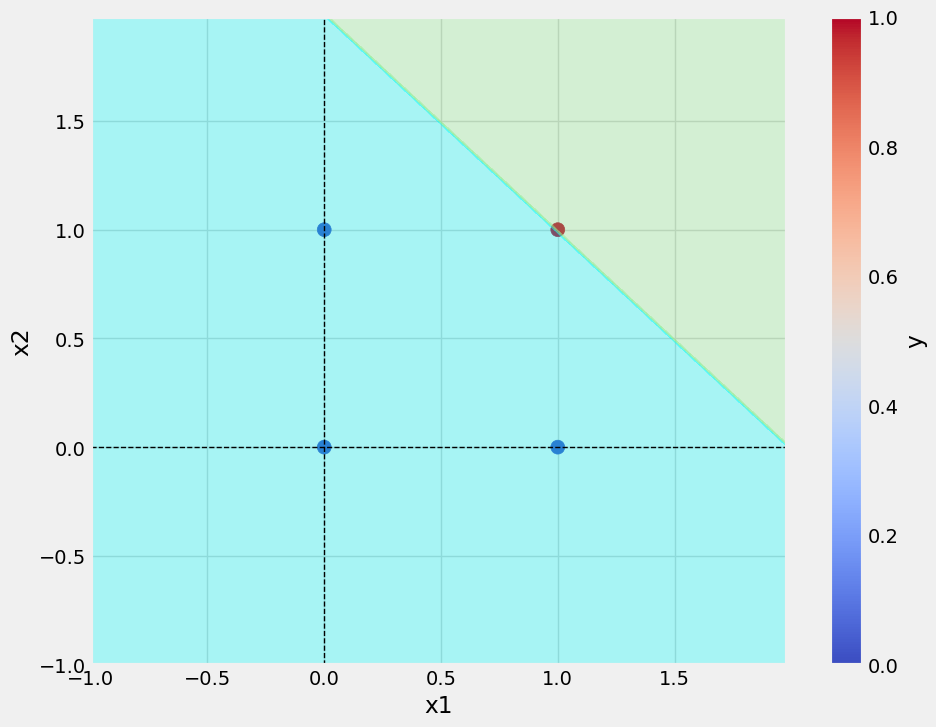

In [48]:
save_plot(df_AND,model_and, filename="and.png")

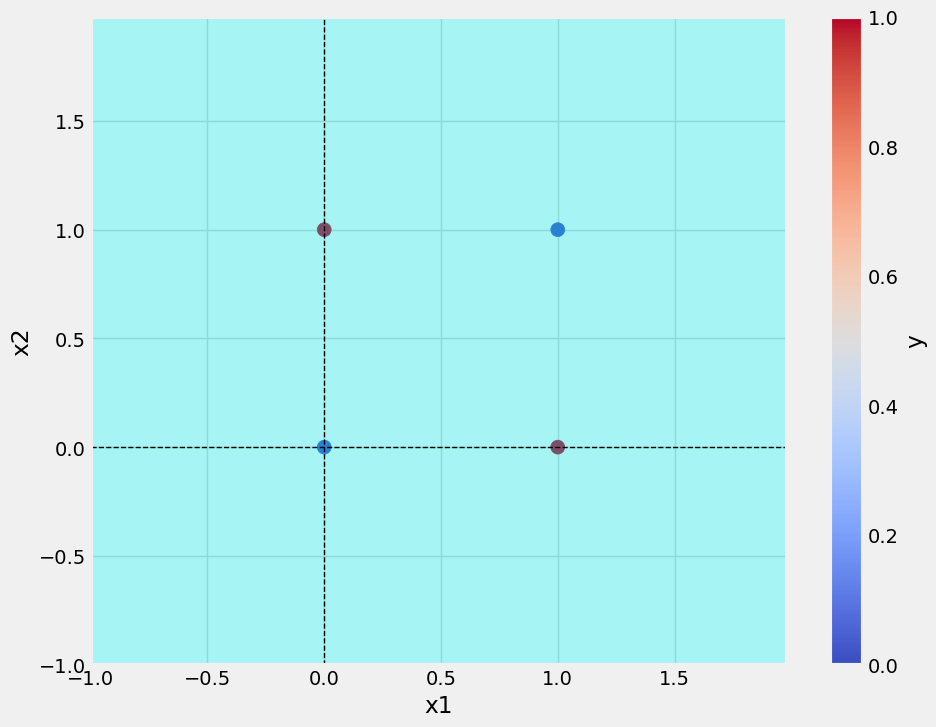

In [49]:
save_plot(df_XOR,model_XOR, filename="xor.png")

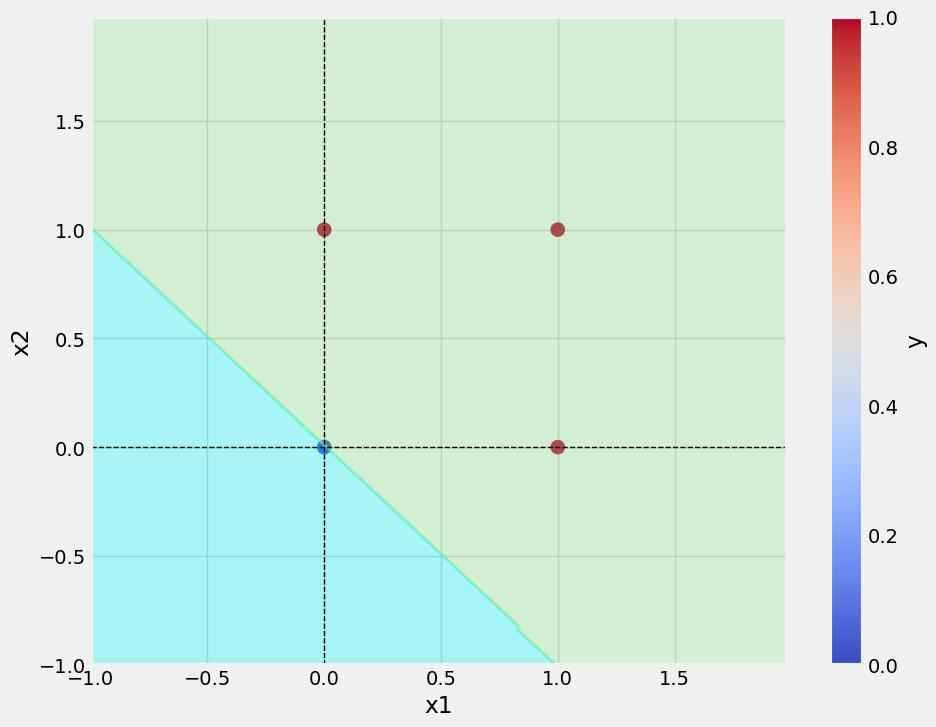

In [50]:
save_plot(df_OR,model_OR, filename="or.png")